# SciPy Tutorial

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basic

### Optimization

In [92]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [93]:
def f(x):
    return (x-3)**2    # defining the function

res = minimize(f, 1)    # giving an initial guess, can be any value
res.x    # gives an array

array([2.99999998])

In [94]:
res.x[0]   # taking the value of x

2.9999999820005776

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to:
$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$
![opt_reg](img/optimization/opt_reg.png)
* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular

In [95]:
# defining the equation in a variable
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2    # x[0], x[1] represent x and y axis respectively

# giving the constraints in a tuple of dictionary
cons =  ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
                {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
                {'type': 'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})

# giving the boundaries where None means infinity
bnds = ((0, None), (0, None))

res = minimize (f, (1, 0), bounds = bnds, constraints = cons)

res.x

array([1.39999999, 1.69999999])

In [96]:
# diff methods to minimize
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <o

![minimize_methods](img/optimization/minimize_methods.svg)

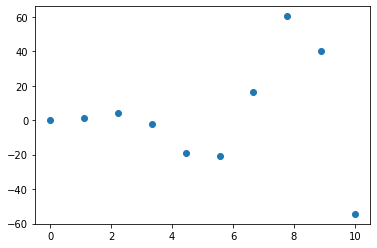

In [97]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

Now, I want to know the values in between.

In [98]:
from scipy.interpolate import interp1d    # importing the module to interpolate (joining the points)

In [99]:
f = interp1d(x, y, kind='cubic')    # we can give linear also resulting joining the points using straight lines
x_dense = np.linspace(0, 10, 100)   # there will be total of 100 points in between the 10 points. more points, better interpolation
y_dense = f(x_dense)   # will take corresponding value of x

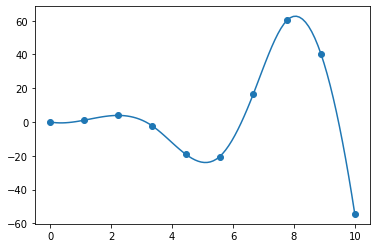

In [100]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## Curve Fitting
*Trivial Example*

In [101]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

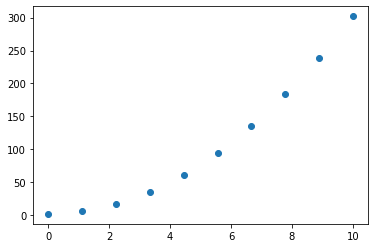

In [102]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [103]:
# importing the method
from scipy.optimize import curve_fit

# defining the function
def func(x, a, b):
    return a*x**2 + b


popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))


In [104]:
popt

array([3., 2.])

*Real Example from Physics*

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [105]:
t_data = np.array([0.,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
                   1.72413793,  2.06896552,  2.4137931,  2.75862069,  3.10344828,
                   3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
                   5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
                   6.89655172,  7.24137931,  7.5862069,  7.93103448,  8.27586207,
                   8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.])
y_data = np.array([4.3303953,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
                   2.16884383,  3.86635998,  1.85194506, -1.8489224, -3.96560495,
                   -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
                   -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
                   -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
                   2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])


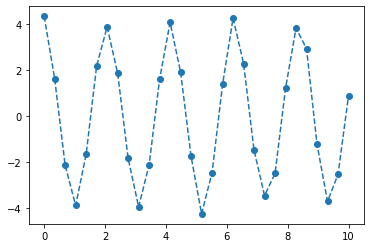

In [106]:
plt.plot(t_data, y_data, 'o--')

$\omega = 2 \pi f$, $f = 1/T$, and $T \approx 2$ seconds. Thus good initial guess is

*   $\omega = 2 \pi(1/2) = \pi$
*   $A = 4$
*   $\phi = 0$

In [107]:
from scipy.optimize import curve_fit


def func(x, A, w, phi):
    return A*np.cos(w*x+phi)


# Guess Should Be Logical, Otherwise The Fitting Will Be Horrible
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

popt   # gives value most probable value of A, w and phi respectively


array([3.94836218, 2.99899521, 0.10411348])

In [108]:
#  parameters
A, w, phi = popt

In [109]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

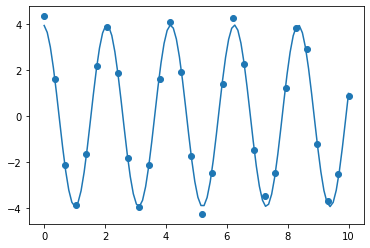

In [110]:
plt.scatter(t_data, y_data)
plt.plot(t, y)

In [111]:
np.diag(pcov)   # the deviation of parameters

array([2.61882717e-03, 1.85638053e-05, 6.63424623e-04])

In [112]:
np.sqrt(np.diag(pcov))   # error in calculation of parameters

array([0.05117448, 0.00430857, 0.02575703])

## Special Functions

**Legendre Polynomials:** <br><br> $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$
*   The angular component of the spherical Schrodinger Equation which permits non-infinite 


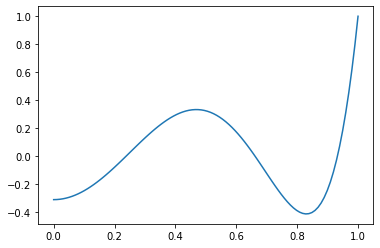

In [113]:
# importing and defining the legendre polynomial equation
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

In [114]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

**Bessel functions:**<br><br> $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

*   Laplace's Equation in Polar Coordinates

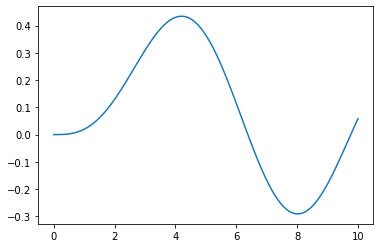

In [115]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

## Calculus

### Differentiation

Differentiation of the following equation - <br> $$x^2\sin{(2x)}e^{-x}$$

In [116]:
from scipy.misc import derivative

In [117]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

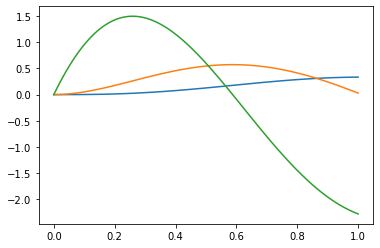

In [118]:
plt.plot(x, f(x))   # plotting the function
plt.plot(x, derivative(f, x, dx=1e-6))   # 1e-6 separation between two points
plt.plot(x, derivative(f, x, dx=1e-6, n=2))   # 2nd order derivative

### Integration

Integration of the following single integral-<br> $$\int_{0}^1 x^2\sin{(2x)}e^{-x}dx$$


In [119]:

from scipy.integrate import quad   # quad method handels the single integration part
def integrand(x): return x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

# Following lines mean same as previous (using lambda function)

# integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
# integral, integral_error = quad(integrand, 0, 1)


In [120]:
integral   # value of the integration

0.14558175869954834

In [121]:
integral_error   # error in the integration value calculation

1.6162822047366225e-15

Integration of the following double integral-<br> $$\int_{0}^1\int_{-x}^{x^2}\sin{(x+y^2)}\,dydx$$

In [122]:
from scipy.integrate import dblquad   # dblquad method handels the double integration part
def integrand(y, x): return np.sin(x+y**2)
def lwr_y(x): return -x
def upr_y(x): return x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

# Following lines mean same as previous (using lambda function)

# integrand = lambda y, x: np.sin(x+y**2)
# lwr_y = lambda x: -x
# upr_y = lambda x: x**2
# integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [123]:
integral

0.590090324408853

In [124]:
integral_error

2.0545915475811425e-14

## Differential Equations

### Single First order ODEs
**ODE** $\equiv$ **Ordinary Differential Equations**

Air friction while falling<br> $$v^{'}-\alpha v^2+ \beta = 0 \hspace {10mm} v(0) = 0$$  

In [125]:
from scipy.integrate import odeint   # importing the library for solving ordinary differential equation

In [126]:
def dvdt(v, t):
    return 3*v**2 - 5 

v0 = 0   # initial condition

I'm returning the value of $\alpha$ and $\beta$, 3 and 5 respectively (arbitary) in the equation $v^{'}=\alpha v^2+\beta$

In [127]:
t = np.linspace(0, 1, 100)   # within a timerange (unitless in SciPy, only value we get) of 0 and 1
sol = odeint(dvdt, v0, t)

In [128]:
sol.T[0]   # values for the solution after taking the transpose (changing into a single row matrix)

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

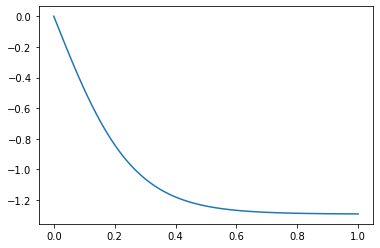

In [129]:
plt.plot(t, sol.T[0])   # plot for the solution

### Coupled First Order ODEs

$$y^{'}=y_1+y^2_2+3x\hspace{10mm}y_1(0)=0$$
$$y^{'}_2=3y_1+y^3_2-\cos(x)\hspace{10mm}y_2(0)=0$$
Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [130]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 3*y1 + y2**3 - np.cos(x)]   # returns (dy1/dx and dy2/dx)

# initial conditions
y1_0 = 0
y2_0 = 0

# giving S the value of initial conditions
S_0 = (y1_0, y2_0)

In [131]:
x = np.linspace(0, 1, 100)   # solvind for 100 values between the value of x 0 and 1
sol = odeint(dSdx, S_0, x)

In [135]:
sol   # it gives an array of values of y1 and y2 at every value of x between 0 and 1

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.53914061e-04, -1.00992734e-02],
       [ 6.19093356e-04, -2.01882005e-02],
       [ 1.40076628e-03, -3.02563164e-02],
       [ 2.50418953e-03, -4.02930766e-02],
       [ 3.93464633e-03, -5.02878361e-02],
       [ 5.69744401e-03, -6.02298432e-02],
       [ 7.79789517e-03, -7.01082428e-02],
       [ 1.02413187e-02, -7.99120712e-02],
       [ 1.30330245e-02, -8.96302498e-02],
       [ 1.61783065e-02, -9.92515816e-02],
       [ 1.96824391e-02, -1.08764749e-01],
       [ 2.35506573e-02, -1.18158303e-01],
       [ 2.77881638e-02, -1.27420669e-01],
       [ 3.24001125e-02, -1.36540133e-01],
       [ 3.73915921e-02, -1.45504834e-01],
       [ 4.27676179e-02, -1.54302762e-01],
       [ 4.85331404e-02, -1.62921756e-01],
       [ 5.46930282e-02, -1.71349495e-01],
       [ 6.12520553e-02, -1.79573493e-01],
       [ 6.82148995e-02, -1.87581095e-01],
       [ 7.55861308e-02, -1.95359467e-01],
       [ 8.33702071e-02, -2.02895598e-01],
       [ 9.

In [133]:
y1 = sol.T[0]
y2 = sol.T[1]

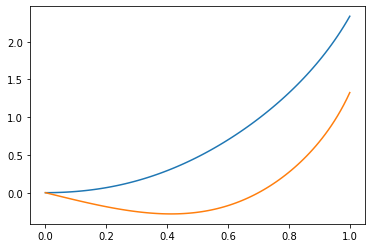

In [136]:
# gives the plot for above coupled first order ODE
plt.plot(x, y1)
plt.plot(x, y2)

### Second Order ODE

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$
* Scipy can only solve coupled first order ODEs, but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$ 
$$d \theta / dt = \omega $$
Let $S = (\theta, \omega)$


In [140]:
def dSdt(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)


In [138]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T


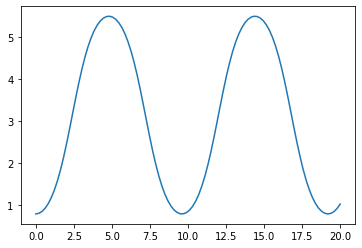

In [139]:
plt.plot(t, theta)
plt.show()
